# Assignment 2

## Data retrieving 

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
from matplotlib.lines import Line2D

In [2]:
# Create a list of names to use when reading the data
names = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education-number', 'Marital-status', 'Occupation',
        'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'Hours-per-week',
        'Native-country', 'Target']

# Load the train and test dataset with feature names added
adult_tr = pd.read_csv('adult.data', header=0, names=names)
adult_test = pd.read_csv('adult.test', header=0, names=names)

# Print first 5 rows of train set
adult_tr.head()

,Age,Workclass,Fnlwgt,Education,Education-number,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Target
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
# Print first 5 rows of test set
adult_test.head()

,Age,Workclass,Fnlwgt,Education,Education-number,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [4]:
# Concatenate the test and train sets; splitting is done later using a different ratio
adult = pd.concat([adult_tr, adult_test])

# Print first 5 rows
adult.head()

,Age,Workclass,Fnlwgt,Education,Education-number,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Target
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
# Print info about the dataset
adult.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48841 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               48841 non-null  int64 
 1   Workclass         48841 non-null  object
 2   Fnlwgt            48841 non-null  int64 
 3   Education         48841 non-null  object
 4   Education-number  48841 non-null  int64 
 5   Marital-status    48841 non-null  object
 6   Occupation        48841 non-null  object
 7   Relationship      48841 non-null  object
 8   Race              48841 non-null  object
 9   Sex               48841 non-null  object
 10  Capital-gain      48841 non-null  int64 
 11  Capital-loss      48841 non-null  int64 
 12  Hours-per-week    48841 non-null  int64 
 13  Native-country    48841 non-null  object
 14  Target            48841 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [6]:
# Print unique values
for col in adult.columns:
    print(f'{col} unique values: {adult[col].unique()}\n')

Age unique values: [50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]

Workclass unique values: [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

Fnlwgt unique values: [ 83311 215646 234721 ... 173449  89686 350977]

Education unique values: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

Education-number unique values: [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

Marital-status unique values: [' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']

Occupation unique values: [' Exec-managerial' ' Handlers-cleaners' ' Prof-spec

In [7]:
# Remove leading whitespaces in all columns
for col in adult.select_dtypes('O').columns:
    adult[col] = adult[col].str.strip()
    
    # Remove trailing fullstops
    adult[col] = adult[col].str.strip('.')

In [8]:
# Missing values are recorded as '?'; replace with nan
for col in adult.select_dtypes('O').columns:
    adult.loc[adult[col] == '?', col] = np.nan
    
# Print info again with missing values
adult.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48841 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               48841 non-null  int64 
 1   Workclass         46042 non-null  object
 2   Fnlwgt            48841 non-null  int64 
 3   Education         48841 non-null  object
 4   Education-number  48841 non-null  int64 
 5   Marital-status    48841 non-null  object
 6   Occupation        46032 non-null  object
 7   Relationship      48841 non-null  object
 8   Race              48841 non-null  object
 9   Sex               48841 non-null  object
 10  Capital-gain      48841 non-null  int64 
 11  Capital-loss      48841 non-null  int64 
 12  Hours-per-week    48841 non-null  int64 
 13  Native-country    47984 non-null  object
 14  Target            48841 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [9]:
# Majority of rows don't have missing values and the missing values are categorical; drop them from the dataset
adult.dropna(inplace=True)

# Print shape after dropping
adult.shape

(45221, 15)

In [10]:
# Check for impossible negative values
for col in ['Age', 'Education-number', 'Capital-gain', 'Capital-loss', 'Hours-per-week']:
    if (adult[col] < 0).sum() > 0:
        print(f'{col} has impossible negative values.')

In [11]:
# Print unique values to check again for errors
for col in adult.columns:
    print(f'{col} unique values: {adult[col].unique()}\n')

Age unique values: [50 38 53 28 37 49 52 31 42 30 23 32 34 25 43 40 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 47 46 36 79 27 18 33 76 55 61 70 64 71 66 51 58
 26 17 60 90 75 65 77 62 63 67 74 72 69 68 73 81 78 88 80 84 83 85 82 86
 89 87]

Workclass unique values: ['Self-emp-not-inc' 'Private' 'State-gov' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay']

Fnlwgt unique values: [ 83311 215646 234721 ... 173449  89686 350977]

Education unique values: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 '7th-8th' 'Doctorate' 'Assoc-voc' 'Prof-school' '5th-6th' '10th'
 'Preschool' '12th' '1st-4th']

Education-number unique values: [13  9  7 14  5 10 12  4 16 11 15  3  6  1  8  2]

Marital-status unique values: ['Married-civ-spouse' 'Divorced' 'Married-spouse-absent' 'Never-married'
 'Separated' 'Married-AF-spouse' 'Widowed']

Occupation unique values: ['Exec-managerial' 'Handlers-cleaners' 'Prof-specialty' 'Other-service'
 'Adm-clerical' 'Sales' 'Transp

## Data Exploration

### Univariate plots

In [12]:
# Print column names
print(adult.columns)

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education-number',
       'Marital-status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital-gain', 'Capital-loss', 'Hours-per-week', 'Native-country',
       'Target'],
      dtype='object')


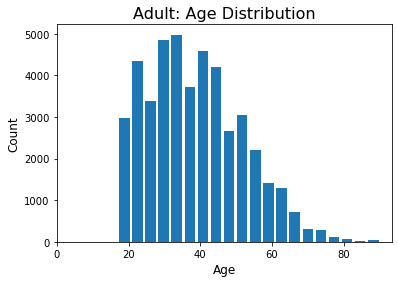

In [13]:
# Plot the ages in a histogram
adult['Age'].plot(kind='hist', bins=20, xlim=0, rwidth=.8)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Adult: Age Distribution', fontsize=16)
plt.show()

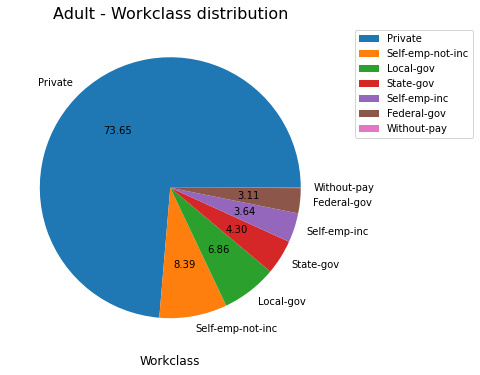

In [14]:
# Plot the distribution of workclasses in a pie chart
adult['Workclass'].value_counts().plot(kind='pie', figsize=(8, 6), 
                                       # only put larger percentages on the plot
                                       autopct=lambda x: '%.2f' % x if x > 0.1 else '')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title('Adult - Workclass distribution', fontsize=16)
plt.xlabel('Workclass', fontsize=12)
plt.ylabel('')
plt.show()

In [15]:
# Print the number of unique values 
print(adult['Fnlwgt'].nunique())

# Print the range of values for fnlwgt
adult['Fnlwgt'].describe().apply(lambda x: '%i' % x)

26740


count      45221
mean      189737
std       105639
min        13492
25%       117392
50%       178319
75%       237928
max      1490400
Name: Fnlwgt, dtype: object

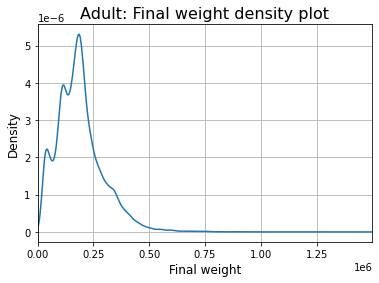

In [16]:
# Plot the distribution of fnlwgt values as a density plot
adult['Fnlwgt'].plot(kind='density', xlim=(0, 1500000), xticks=range(0, 1500000, 250000))
plt.title('Adult: Final weight density plot', fontsize=16)
plt.xlabel('Final weight', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid()
plt.show()

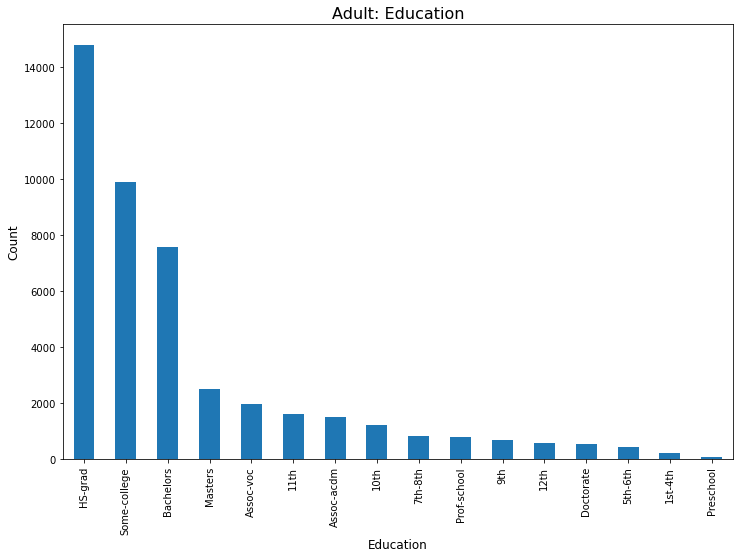

In [17]:
# Plot the proportion of education values as a pie chart
adult['Education'].value_counts().plot(kind='bar', figsize=(12, 8))
plt.xlabel('Education', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Adult: Education', fontsize=16)
plt.show()

In [18]:
# Check the values of education-number
education_ranks = {}
for i, value in enumerate(adult['Education'].unique()):
    uniques = adult.loc[adult['Education'] == value, 'Education-number'].unique()
    if len(uniques) > 1:
        print(f'{value} has more than one unique value.')
    education_ranks[value] = uniques[0] 
    
# Check if there is some order to the education numbers
print(education_ranks)

{'Bachelors': 13, 'HS-grad': 9, '11th': 7, 'Masters': 14, '9th': 5, 'Some-college': 10, 'Assoc-acdm': 12, '7th-8th': 4, 'Doctorate': 16, 'Assoc-voc': 11, 'Prof-school': 15, '5th-6th': 3, '10th': 6, 'Preschool': 1, '12th': 8, '1st-4th': 2}


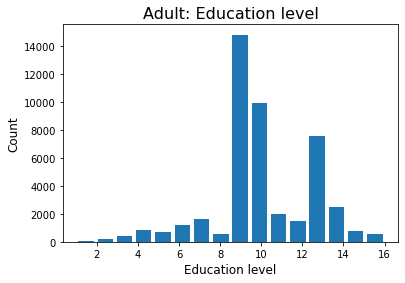

In [19]:
# Plot the education levels as a histogram
adult['Education-number'].plot(kind='hist', bins=adult['Education-number'].nunique(), rwidth=0.8)
plt.xlabel('Education level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Adult: Education level', fontsize=16)
plt.show()

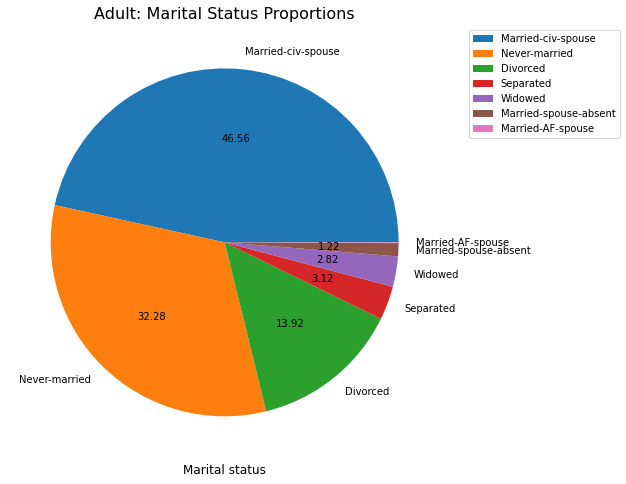

In [20]:
# Plot the proportions of marital status as a pie chart
adult['Marital-status'].value_counts().plot(kind='pie', figsize=(10, 8),
                                           autopct=lambda x: '%.2f' % x if x > 0.1 else '')
plt.ylabel('')
plt.xlabel('Marital status', fontsize=12)
plt.title('Adult: Marital Status Proportions', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

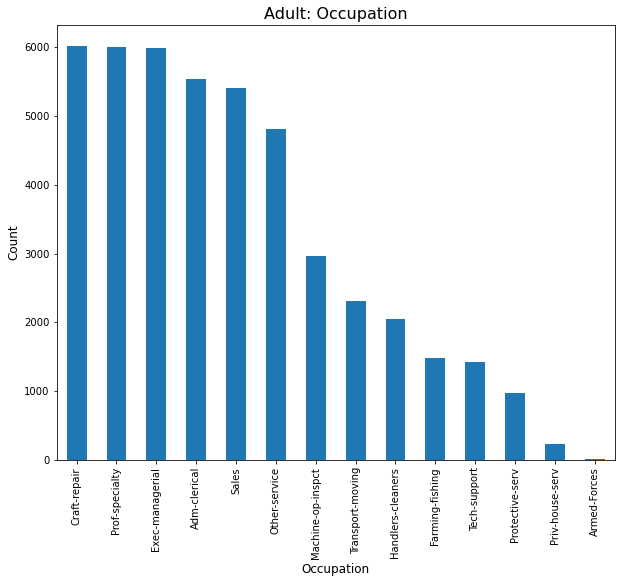

In [21]:
# Plot the occupations as a pie chart
adult['Occupation'].value_counts().plot(kind='bar', figsize=(10, 8))
plt.title('Adult: Occupation', fontsize=16)
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

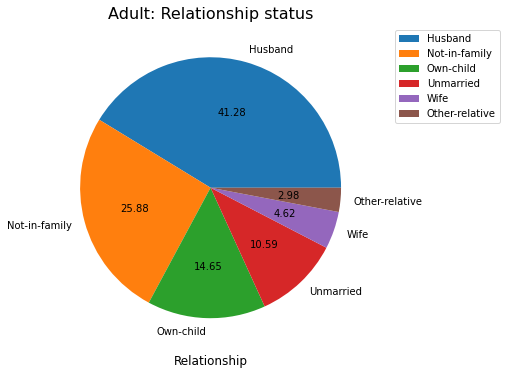

In [22]:
# Plot the relationship categories as a pie chart
adult['Relationship'].value_counts().plot(kind='pie', figsize=(8, 6), autopct='%.2f')
plt.ylabel('')
plt.xlabel('Relationship', fontsize=12)
plt.title('Adult: Relationship status', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

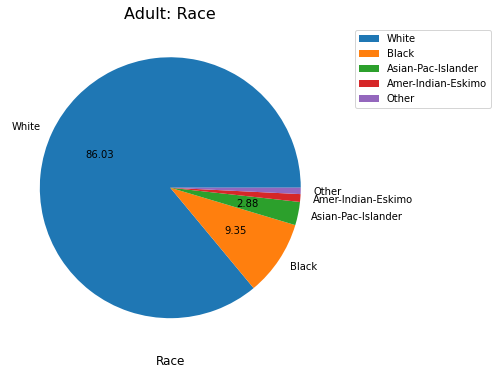

In [23]:
# Plot the race proportions as a pie chart
adult['Race'].value_counts().plot(kind='pie', figsize=(8, 6), 
                                  autopct=lambda x: '%.2f' % x if x > 1 else '')
plt.ylabel('')
plt.xlabel('Race', fontsize=12)
plt.title('Adult: Race', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

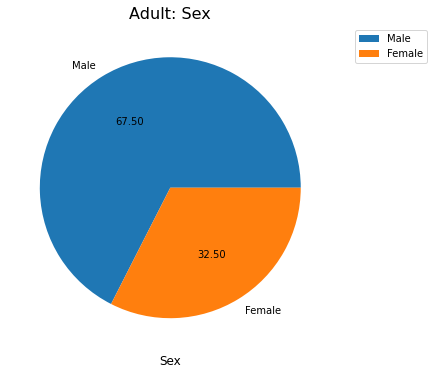

In [24]:
# Plot the sex as a pie chart
adult['Sex'].value_counts().plot(kind='pie', figsize=(8, 6), autopct='%.2f')
plt.ylabel('')
plt.xlabel('Sex', fontsize=12)
plt.title('Adult: Sex', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

In [25]:
# Print the value summary of the capital gain data
adult['Capital-gain'].describe().apply(lambda x: '%i' % x)

count    45221
mean      1101
std       7506
min          0
25%          0
50%          0
75%          0
max      99999
Name: Capital-gain, dtype: object

In [26]:
# What proportion of adults had no capital gain
print(f"{round((adult['Capital-gain'].value_counts()[0] / len(adult))*100)}% of adults had no capital gain.")

# Print the 10 most frequent capital gain values
print('\nMost frequent capital gain values:')
print(adult['Capital-gain'].value_counts().head(10))

92% of adults had no capital gain.

Most frequent capital gain values:
0        41432
15024      498
7688       391
7298       351
99999      229
3103       146
5178       137
5013       116
4386       102
3325        81
Name: Capital-gain, dtype: int64


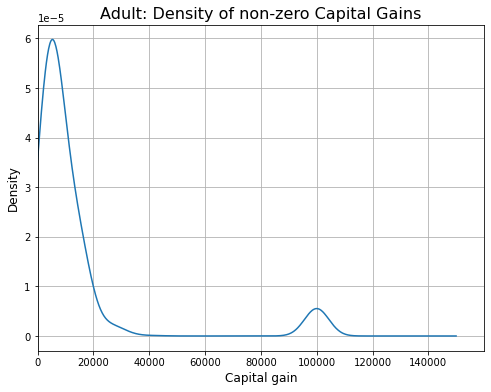

In [27]:
# Plot the distribution of non-zero capital gain values
adult.loc[adult['Capital-gain'] != 0, 'Capital-gain'].plot(kind='density', xlim=0, figsize=(8,6))
plt.xlabel('Capital gain', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Adult: Density of non-zero Capital Gains', fontsize=16)
plt.grid()
plt.show()

In [28]:
# Print descriptive statistics of capital losses
adult['Capital-loss'].describe().apply(lambda x: '%i' % x)

count    45221
mean        88
std        404
min          0
25%          0
50%          0
75%          0
max       4356
Name: Capital-loss, dtype: object

In [29]:
# What proportion of adults had no capital loss
print(f"{round((adult['Capital-loss'].value_counts()[0] / len(adult))*100)}% of adults had no capital losses.")

# Print the 10 most frequent capital gain values
print('\nMost frequent capital loss values:')
print(adult['Capital-loss'].value_counts().head(10))

95% of adults had no capital losses.

Most frequent capital loss values:
0       43081
1902      294
1977      246
1887      228
2415       68
1485       65
1848       65
1876       59
1590       58
1740       57
Name: Capital-loss, dtype: int64


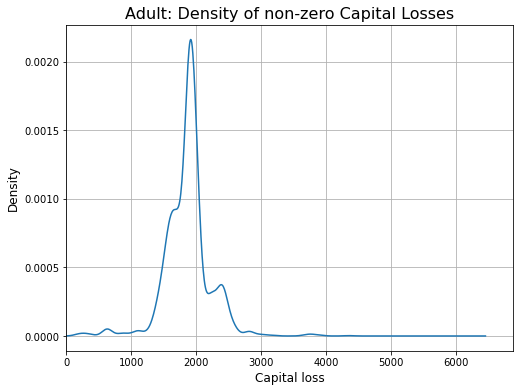

In [30]:
# Plot the distribution of non-zero capital loss values
adult.loc[adult['Capital-loss'] != 0, 'Capital-loss'].plot(kind='density', xlim=0, figsize=(8,6))
plt.xlabel('Capital loss', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Adult: Density of non-zero Capital Losses', fontsize=16)
plt.grid()
plt.show()

In [31]:
# Print descriptive statistics for the number of hours worked per week
print(adult['Hours-per-week'].describe().apply(lambda x: int(x)))

# How many people worked more than 70 hours
print(f"\n{(adult['Hours-per-week'] > 70).sum()} people worked more than 70 hours.")

count    45221
mean        40
std         12
min          1
25%         40
50%         40
75%         45
max         99
Name: Hours-per-week, dtype: int64

715 people worked more than 70 hours.


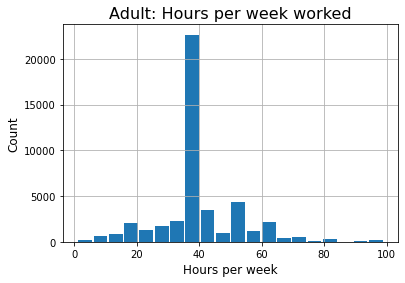

In [32]:
## Plot the hours per week as a histogram
adult['Hours-per-week'].plot(kind='hist', bins=20, rwidth=0.9)
plt.xlabel('Hours per week', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Adult: Hours per week worked', fontsize=16)
plt.grid()
plt.show()

In [33]:
# Print proportions of the number of people working a certain number of hours
print('Proportions of people working a number of hours:')
((adult['Hours-per-week'].value_counts()/len(adult)).head(10) * 100).apply(lambda x: str('%.2f' % x) + '%')

Proportions of people working a number of hours:


40    47.23%
50     9.05%
45     5.75%
60     4.61%
35     3.93%
20     3.54%
30     3.24%
55     2.26%
25     1.81%
48     1.62%
Name: Hours-per-week, dtype: object

In [34]:
# Print the proportions of the most frequent native countries in the dataset
(adult['Native-country'].value_counts() / len(adult) * 100).head(10).apply(lambda x: str('%.2f' % x) + '%')

United-States    91.31%
Mexico            2.00%
Philippines       0.63%
Germany           0.43%
Puerto-Rico       0.39%
Canada            0.36%
El-Salvador       0.33%
India             0.33%
Cuba              0.29%
England           0.26%
Name: Native-country, dtype: object

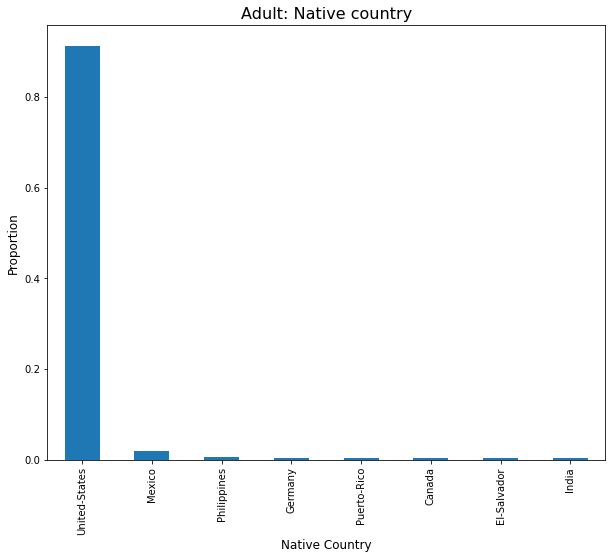

In [35]:
# Plot the most represented native countries as a bar chart
adult['Native-country'].value_counts(normalize=True).head(8).plot(kind='bar', figsize=(10, 8))
plt.title('Adult: Native country', fontsize=16)
plt.xlabel('Native Country', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.show()

In [36]:
# The dataset is dominated by native US adults; print the proportions without considering these people
sub_df = adult.loc[adult['Native-country'] != 'United-States']

(sub_df['Native-country'].value_counts() / len(sub_df) * 100).head(10).apply(lambda x: str('%.2f' % x) + '%')

Mexico         22.98%
Philippines     7.20%
Germany         4.91%
Puerto-Rico     4.45%
Canada          4.15%
El-Salvador     3.74%
India           3.74%
Cuba            3.38%
England         3.03%
China           2.88%
Name: Native-country, dtype: object

In [37]:
# Print number of unique categories
print(f'There are {adult["Native-country"].nunique()} countries represented in the dataset.')

# Print descriptive statistics of the proportions without US natives considered
(sub_df['Native-country'].value_counts() / len(sub_df) * 100).describe()

There are 41 countries represented in the dataset.


count    40.000000
mean      2.500000
std       3.641661
min       0.025445
25%       0.731552
50%       1.666667
75%       2.684478
max      22.977099
Name: Native-country, dtype: float64

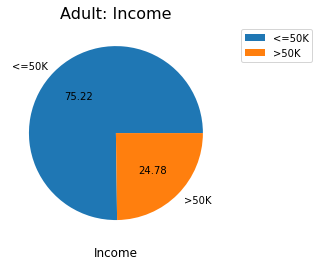

In [38]:
# Plot the proportions of the target variable as a pie chart
adult['Target'].value_counts().plot(kind='pie', autopct='%.2f')
plt.ylabel('')
plt.xlabel('Income', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title('Adult: Income', fontsize=16)
plt.show()

### Bivariate plots

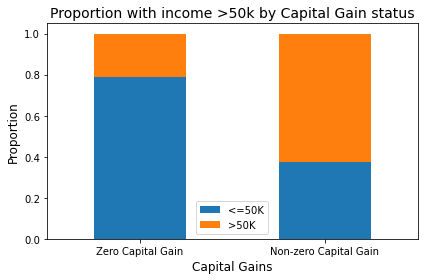

In [39]:
## Hypothesis: A higher proportion of people have an income >50k for the people with 
## non-zero capital gains relative to those with zero capital gains.

# Create a dummy variable which is 1 if capital gains is non-zero, 0 otherwise
adult['dummy'] = 0
adult.loc[adult['Capital-gain'] > 0, 'dummy'] = 1

# Create two series with the target variable proportions for both dummy categories
no_gains = adult.loc[adult['dummy'] == 0, 'Target'].value_counts(normalize=True)
gains = adult.loc[adult['dummy'] == 1, 'Target'].value_counts(normalize=True)

# Combine the two series into a dataframe and visualise on a stacked bar plot
pd.DataFrame({'Zero Capital Gain':no_gains, 'Non-zero Capital Gain':gains}).T.plot(kind='bar', stacked=True, rot=0)
plt.ylabel('Proportion', fontsize=12)
plt.xlabel('Capital Gains', fontsize=12)
plt.title('Proportion with income >50k by Capital Gain status', fontsize=14)
plt.tight_layout()
plt.show()

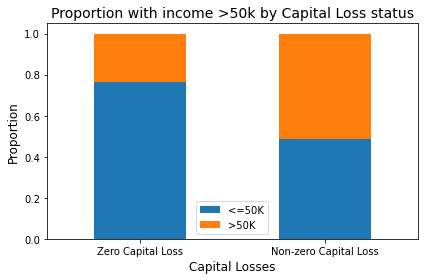

In [40]:
## Hypothesis: Check proportions for those with non-zero capital losses in the same way

# Create a dummy variable which is 1 if capital losses are non-zero, 0 otherwise
adult['dummy'] = 0
adult.loc[adult['Capital-loss'] > 0, 'dummy'] = 1

# Create two series with the target variable proportions for both dummy categories
no_loss = adult.loc[adult['dummy'] == 0, 'Target'].value_counts(normalize=True)
loss = adult.loc[adult['dummy'] == 1, 'Target'].value_counts(normalize=True)

# Combine the two series into a dataframe and visualise on a stacked bar plot
pd.DataFrame({'Zero Capital Loss':no_loss, 'Non-zero Capital Loss':loss}).T.plot(kind='bar', stacked=True, rot=0)
plt.ylabel('Proportion', fontsize=12)
plt.xlabel('Capital Losses', fontsize=12)
plt.title('Proportion with income >50k by Capital Loss status', fontsize=14)
plt.tight_layout()
plt.show()

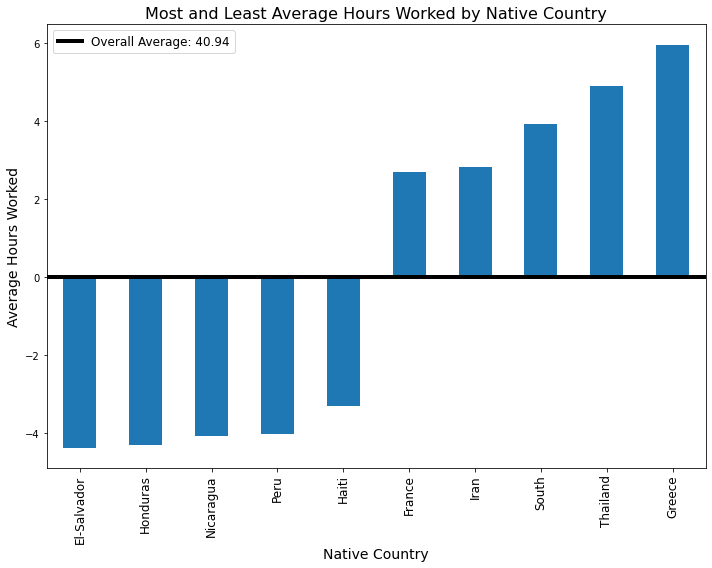

In [41]:
## Hypothesis: Adults from certain native countries will have a higher average number of hours worked per week

# Create a sorted dataframe (least to most) of the average hours worked by native country
hrs_by_country = adult.groupby('Native-country')['Hours-per-week'].mean().sort_values()

# Drop all except the lowest and highest 5 countries
hrs_by_country = pd.concat([hrs_by_country.head(), hrs_by_country.tail()])

# Subtract the overall average hours worked
overall_avg = adult['Hours-per-week'].mean()
hrs_by_country = hrs_by_country - overall_avg

# Plot the average hours worked on a bar plot
hrs_by_country.plot(kind='bar', figsize=(10, 8))
plt.xticks(fontsize=12)
plt.xlabel('Native Country', fontsize=14)
plt.ylabel('Average Hours Worked', fontsize=14)
plt.title('Most and Least Average Hours Worked by Native Country', fontsize=16)

# Add a horizontal line for the overall mean
plt.axhline(0, color='black', lw=4)

# Add legend for the line
plt.legend([Line2D([0], [0], color='black', lw=4)], [f'Overall Average: {round(overall_avg, 2)}'], fontsize=12)

plt.tight_layout()
plt.show()

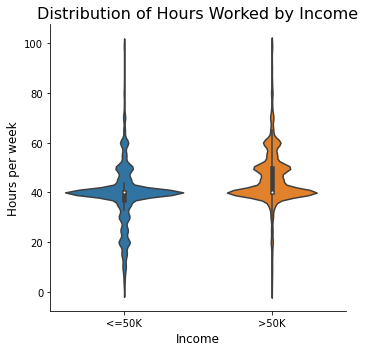

In [42]:
## Hypothesis: Proportion of people with >50k income work more on average

# Use violin plots to visualise the distribution of hours worked for each income category
sns.catplot(x='Target', y='Hours-per-week', kind='violin', data=adult, figsize=(10, 8))
plt.xlabel('Income', fontsize=12)
plt.ylabel('Hours per week', fontsize=12)
plt.title('Distribution of Hours Worked by Income', fontsize=16)
plt.tight_layout()
plt.show()

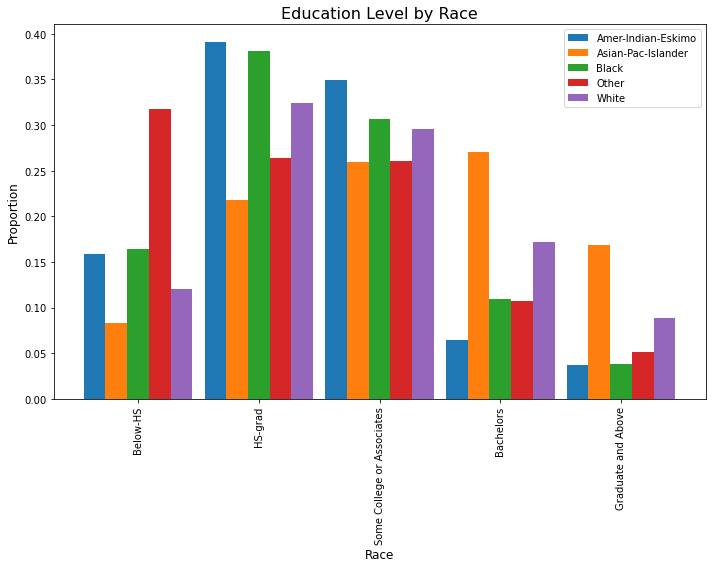

In [43]:
## Hypothesis: Education level will vary by race

# Create a dummy variable to combine all education levels below highschool
adult['dummy'] = adult['Education']
adult.loc[adult['Education-number'] < 9, 'dummy'] = 'Below-HS'
adult.loc[adult['Education-number'] > 13, 'dummy'] = 'Graduate and Above'
adult.loc[adult['Education-number'].isin([10, 11, 12]), 'dummy'] = 'Some College or Associates'

# Create a dataframe with proportions for each reduced education level by race
plot_df = adult.groupby('Race')['dummy'].value_counts(normalize=True).unstack()

# Delete the dummy variables
del adult['dummy']

# Reorder columns in a logical way
plot_df = plot_df[['Below-HS', 'HS-grad', 'Some College or Associates', 'Bachelors', 'Graduate and Above']]

# Plot the data as a bar graph
plot_df.T.plot(kind='bar', figsize=(10, 8), width=0.9)
plt.xlabel('Race', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.title('Education Level by Race', fontsize=16)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

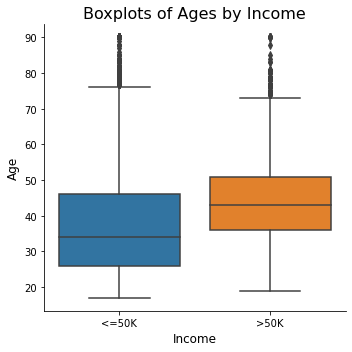

In [44]:
## Hypothesis: Older people tend to have a higher proportion earning >50k

# Plot the distribution of ages as a boxplot by target variable
sns.catplot(x='Target', y='Age', kind='box', data=adult)
plt.xlabel('Income', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.title('Boxplots of Ages by Income', fontsize=16)
plt.tight_layout()
plt.show()

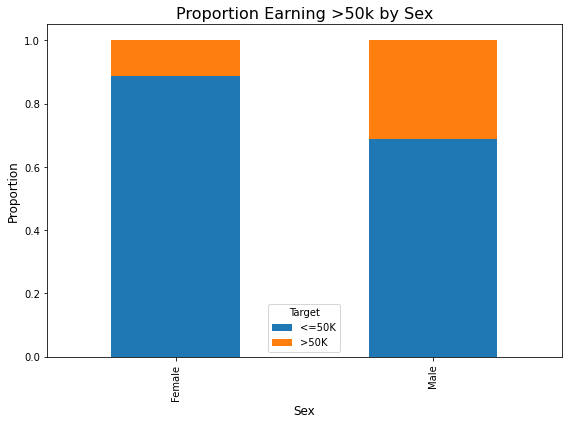

In [45]:
## Hypothesis: A higher proportion of men will earn >50k relative to women

# Create a dataframe of proportions earning >50k by sex
plot_df = adult.groupby('Sex')['Target'].value_counts(normalize=True).unstack()

# Plot the proportions as a  bar graph
plot_df.plot(kind='bar', figsize=(8, 6), stacked=True)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.title('Proportion Earning >50k by Sex', fontsize=16)
plt.tight_layout()
plt.show()

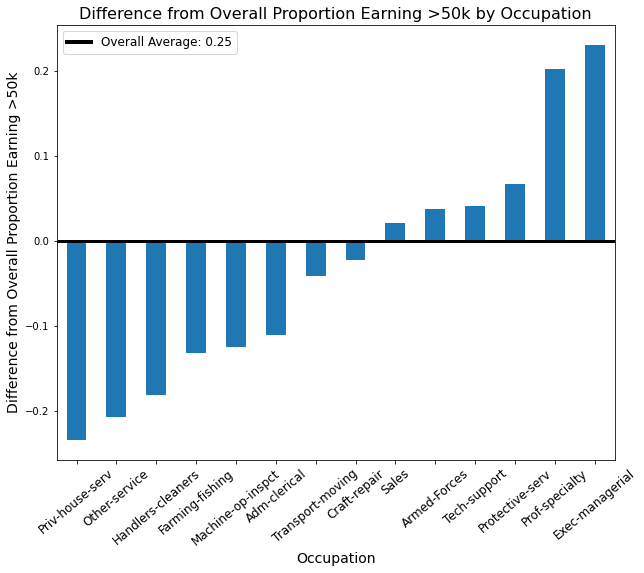

In [46]:
## Hypothesis: There is a difference in proportions earning >50k for different occupations

# Create a new dataframe with proportions earning above 50k by occupation
plot_df = adult.groupby('Occupation')['Target'].value_counts(normalize=True).unstack()

# Remove column with <=50k
plot_df = plot_df['>50K']

# Subtract the average overall proportion
overall_avg = adult['Target'].value_counts(normalize=True)[1]
plot_df = plot_df - overall_avg

# Sort values
plot_df = plot_df.sort_values()

# Plot on a bar graph
plot_df.plot(kind='bar', figsize=(10, 8), rot=40)
plt.xlabel('Occupation', fontsize=14)
plt.ylabel('Difference from Overall Proportion Earning >50k', fontsize=14)
plt.title('Difference from Overall Proportion Earning >50k by Occupation', fontsize=16)
plt.xticks(fontsize=12)

# Add a line at 0
plt.axhline(0, lw=3, color='black')

# Add legend for the overall average proportion earning >50k
plt.legend([Line2D([0], [0], color='black', lw=4)], [f'Overall Average: {round(overall_avg, 2)}'], fontsize=12)

#plt.tight_layout()
plt.show()

In [47]:
adult.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education-number',
       'Marital-status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital-gain', 'Capital-loss', 'Hours-per-week', 'Native-country',
       'Target'],
      dtype='object')

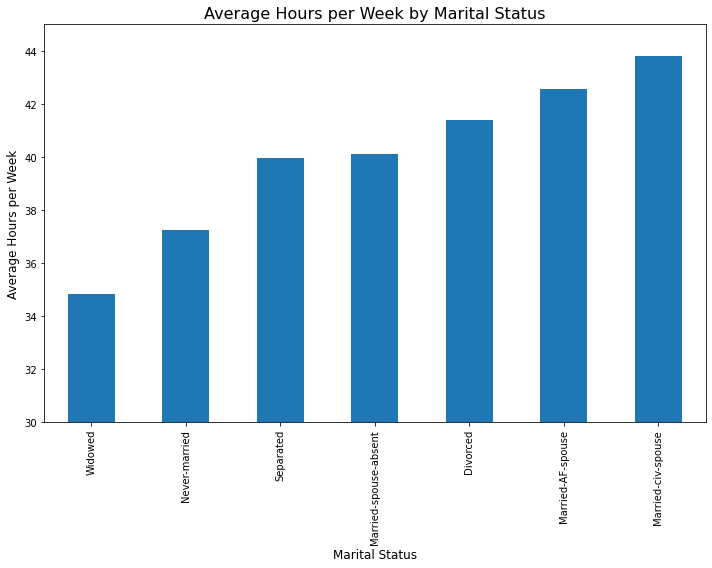

In [48]:
## Hypothesis: Married people work more hours on average

# Create a new dataframe with average hours by marital status
plot_df = adult.groupby('Marital-status')['Hours-per-week'].mean()

# Sort values
plot_df.sort_values(inplace=True)

# Plot the data as a bar graph
plot_df.plot(kind='bar', ylim=(30, 45), figsize=(10, 8))
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Average Hours per Week', fontsize=12)
plt.title('Average Hours per Week by Marital Status', fontsize=16)
plt.tight_layout()
plt.show()

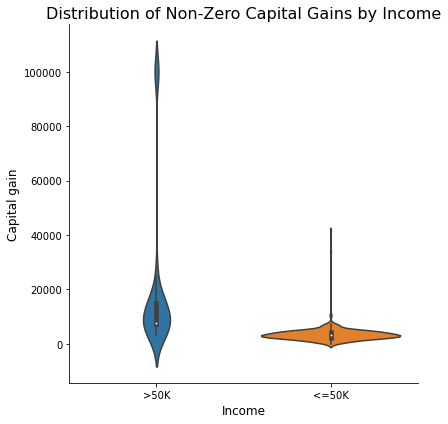

In [49]:
## Hypothesis: Greater magnitudes of capital gains are correlated with higher proportion earning >50k

# Create new dataframe without the zero capital gains 
plot_df = adult.loc[adult['Capital-gain'] > 0]

# Plot distribution using violin
sns.catplot(x='Target', y='Capital-gain', kind='violin', data=plot_df, height=6)
plt.title('Distribution of Non-Zero Capital Gains by Income', fontsize=16)
plt.xlabel('Income', fontsize=12)
plt.ylabel('Capital gain', fontsize=12)
plt.tight_layout()
plt.show()

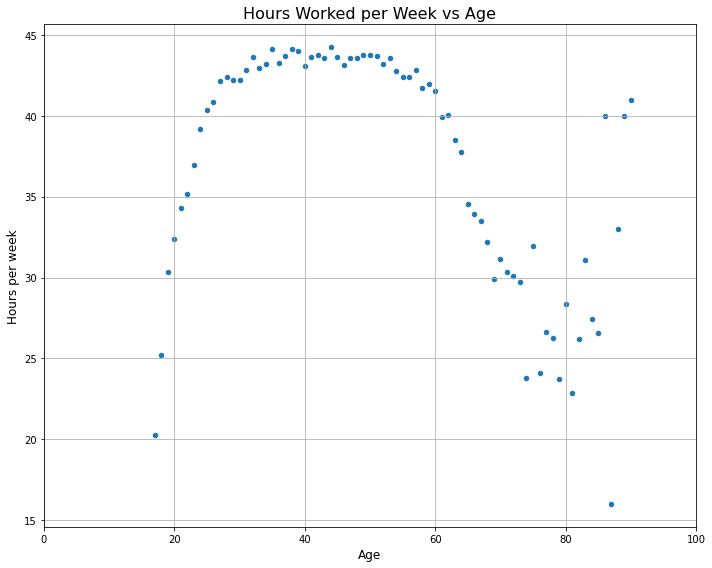

In [50]:
## Hypothesis: Young people and old people tend to work fewer hours each week

# Create new dataframe with the average hours per week grouped by age
plot_df = adult.groupby('Age')['Hours-per-week'].mean().reset_index()
plot_df

# Plot the variables in a scatter plot
plot_df.plot(kind='scatter', x='Age', y='Hours-per-week', xlim=(0, 100), figsize=(10, 8))
plt.xlabel('Age', fontsize=12)
plt.ylabel('Hours per week', fontsize=12)
plt.title('Hours Worked per Week vs Age', fontsize=16)
plt.tight_layout()
plt.grid()
plt.show()

## Data Modelling

In [51]:
# Import libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from tqdm.notebook import tqdm

In [52]:
# Encode the target variable to be 1 if income >50k, 0 otherwise, to enable use in metric functions
le = LabelEncoder()
adult['Target'] = le.fit_transform(adult['Target'])

In [53]:
# The native country has a large number of categories which are not very populated, using one-hot-encoded
# columns adds a lot of features with not a lot of information.  Drop this column
print(adult['Native-country'].value_counts().tail(10))

Hong                          28
Trinadad&Tobago               26
Cambodia                      26
Yugoslavia                    23
Outlying-US(Guam-USVI-etc)    22
Laos                          21
Scotland                      20
Honduras                      19
Hungary                       18
Holand-Netherlands             1
Name: Native-country, dtype: int64


In [54]:
# A baseline error rate can be found by predicting the most common class every time
baseline = adult['Target'].value_counts()[1] / adult['Target'].shape[0] 
print(f'Naive baseline error rate: {round(baseline, 4)}')

Naive baseline error rate: 0.2478


In [55]:
# Define a list of columns not to use in training
drop_cols = ['Native-country']

# Drop the columns
X_columns = [col for col in adult.columns if col not in drop_cols]

# Convert categorical data to one-hot-encoded variables
knn_df = adult.copy()
adult = pd.get_dummies(adult[X_columns])

# Define features columns 
X_columns = [col for col in adult.columns if col not in ['Target']]

In [56]:
# Define a function which accepts a list of features, hyperparameters and a ratio for the training set size 
# used to split the dataset into train and test sets.  Returns a trained DecisionTreeClassifier and a 
# dictionary of metrics and hyperparameters used.

def create_tree(X_train, X_test, y_train, y_test, samples=2, max_feats='sqrt',
                 tr_size=0.5, verbose=True):
    
    # Create the classifier
    clf = DecisionTreeClassifier(min_samples_split=samples, max_features=max_feats, random_state=0)
    
    # Fit the classifier to the training set
    clf.fit(X_train, y_train)
    
    # Make predictions on the test set
    preds = clf.predict(X_test)
    
    # Compute relevant model performance metrics and store them in a dictionary along with the hyperparameters
    metrics = {}
    metrics['conf_mat'] = confusion_matrix(y_test, preds)
    metrics['err_rate'] = 1 - accuracy_score(y_test, preds)
    metrics['precision'] = precision_score(y_test, preds)
    metrics['recall'] = recall_score(y_test, preds)
    metrics['f1'] = f1_score(y_test, preds)
    metrics['max_features'] = max_feats
    metrics['min_samples_split'] = samples
    metrics['tr_size'] = tr_size
    
    # If verbose, report metrics
    if verbose:
        for key in metrics.keys():
            print(f'{key}: {metrics[key]}')
        
    return clf, metrics

In [57]:
# Two hyperparameters will be considered: max_features and min_samples_split

# Create a list of candidate values for min_samples_split
min_samples_list = [5*x for x in range(2, 50)]

# Create a list of values to be used for max_features
max_feat_list = [0.2, 0.4, 0.6, 0.8]

# Create a list of the required train/test ratios 
ratios_list = [0.5, 0.6, 0.8]

# Create a list which appends the results of each trial
trial_results = []

# Loop over each train/test split value
for tr_size in ratios_list:
    
    # Create training and test sets
    X_train, X_test, y_train, y_test = train_test_split(adult[X_columns], adult['Target'], train_size=tr_size,
                                                       stratify=adult['Target'])
    print(f'Training set shape: {X_train.shape}\nTest set shape: {X_test.shape}')

 
    # Loop over each max_features value
    for feat_ratio in tqdm(max_feat_list):

        # Loop over each min_samples_split value for each max_features value
        for samples in min_samples_list:

            # Train a model with each combination of hyperparameters
            clf, metrics = create_tree(X_train, X_test, y_train, y_test, samples=samples, max_feats=feat_ratio,
                                        tr_size=tr_size, verbose=False)

            # Append the metrics
            trial_results.append(metrics)

Training set shape: (22610, 63)
Test set shape: (22611, 63)



Training set shape: (27132, 63)
Test set shape: (18089, 63)



Training set shape: (36176, 63)
Test set shape: (9045, 63)


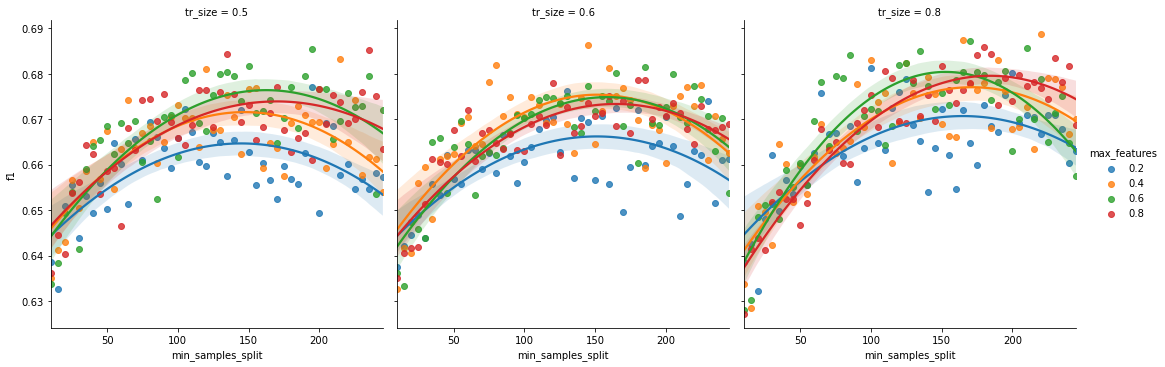

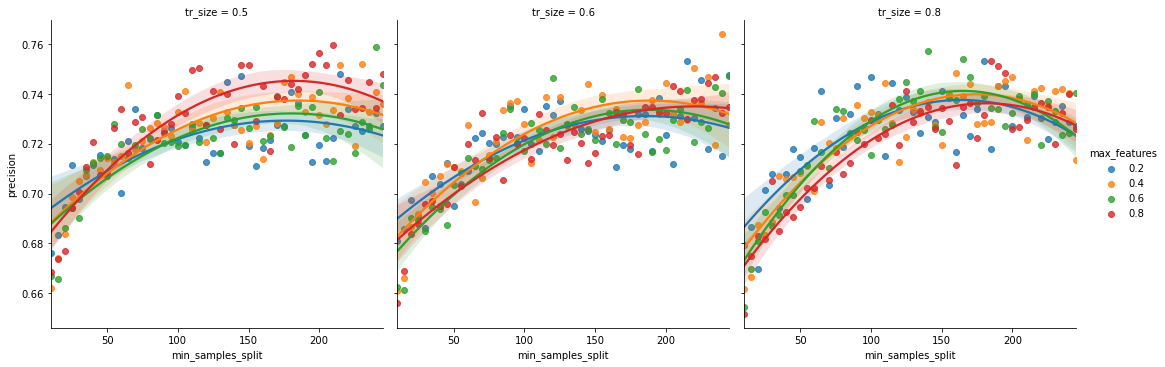

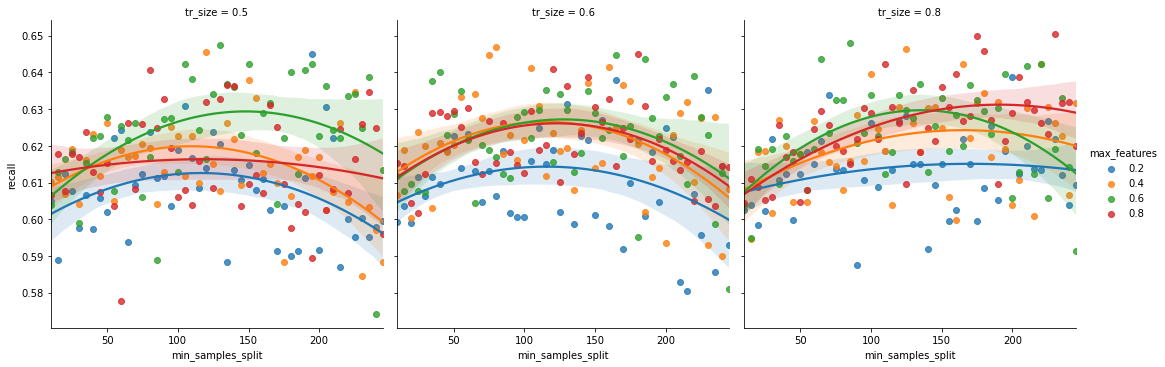

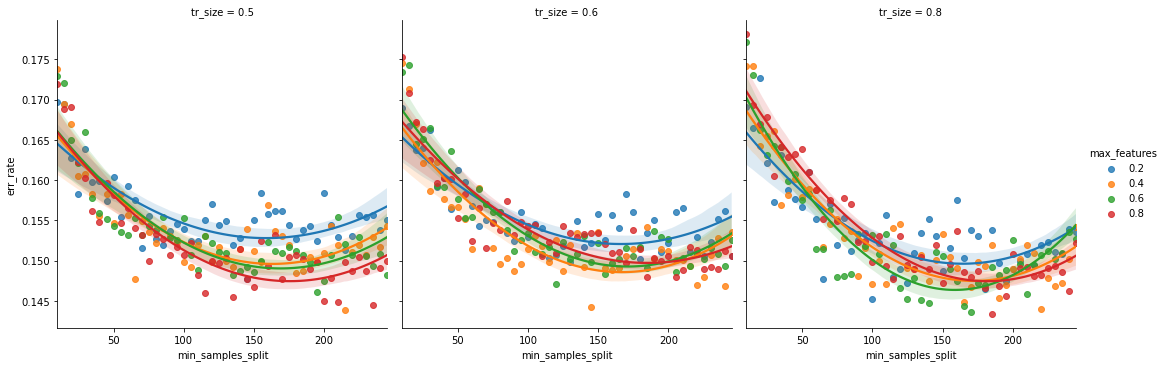

In [58]:
# Create a dataframe containing all the scores for each metric
scores_df = pd.DataFrame(trial_results)

# Plot each metric as a function of the hyperparameter choices for each train/test split
sns.lmplot(x='min_samples_split', y='f1', hue='max_features', data=scores_df, col='tr_size', order=2)
sns.lmplot(x='min_samples_split', y='precision', hue='max_features', data=scores_df, col='tr_size', order=2)
sns.lmplot(x='min_samples_split', y='recall', hue='max_features', data=scores_df, col='tr_size', order=2)
sns.lmplot(x='min_samples_split', y='err_rate', hue='max_features', data=scores_df, col='tr_size', order=2)

In [59]:
scores_df['F1 Score'] = scores_df['f1']
scores_df['Minimum Samples for Splits'] = scores_df['min_samples_split']
scores_df['Proportion of Features Considered'] = scores_df['max_features'] 
scores_df['Training Set Proportion'] = scores_df['tr_size']

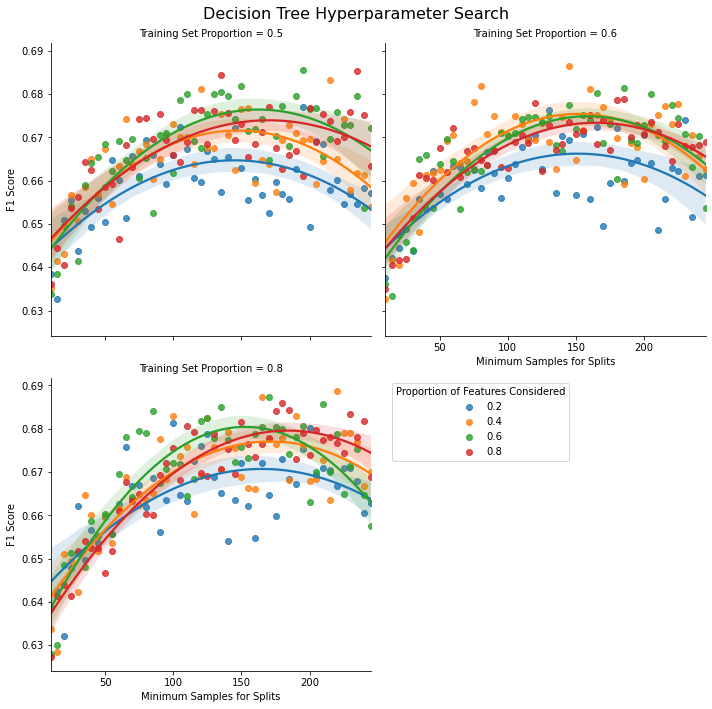

In [60]:
# Format a plot for the report

lm = sns.lmplot(x='Minimum Samples for Splits', y='F1 Score', hue='Proportion of Features Considered', 
           data=scores_df, col='Training Set Proportion', order=2, col_wrap=2, legend=False)
fig = lm.fig
fig.suptitle('Decision Tree Hyperparameter Search', fontsize=16)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05,1), title='Proportion of Features Considered')
plt.show()

In [61]:
# For each train/test split, report the metrics for the best model as measured by the peak F1 score
print('Train size 50%:\n')
print(scores_df.query('tr_size == 0.5 & min_samples_split == 175 & max_features == 0.8'))
print(f'{"*"*100}')

print('\nTrain size 60%:\n')
print(scores_df.query('tr_size == 0.6 & min_samples_split == 175 & max_features == 0.8'))
print(f'{"*"*100}')

print('\nTrain size 80%:\n')
print(scores_df.query('tr_size == 0.5 & min_samples_split == 175 & max_features == 0.6'))
print(f'{"*"*100}')

Train size 50%:

                          conf_mat  err_rate  precision    recall        f1  \
177  [[15794, 1213], [2188, 3416]]  0.150414   0.737956  0.609565  0.667644   

     max_features  min_samples_split  tr_size  F1 Score  \
177           0.8                175      0.5  0.667644   

     Minimum Samples for Splits  Proportion of Features Considered  \
177                         175                                0.8   

     Training Set Proportion  
177                      0.5  
****************************************************************************************************

Train size 60%:

                          conf_mat  err_rate  precision    recall        f1  \
369  [[12518, 1088], [1695, 2788]]   0.15385   0.719298  0.621905  0.667065   

     max_features  min_samples_split  tr_size  F1 Score  \
369           0.8                175      0.6  0.667065   

     Minimum Samples for Splits  Proportion of Features Considered  \
369                         175    

In [62]:
# Uncomment to save the metrics for best models to csv
# (scores_df.query('min_samples_split == 175 & max_features == 0.8')).to_csv('fname.csv')

In [63]:
# Create a list of candidate k values
k_list = [k for k in range(1, 30)]

# Define a function which returns the results of the trials given a set of features
def create_knn(df):
    # Create a list of trial results
    trial_results = []
    
    # Define features
    X_columns = [x for x in df.columns if x not in ['Target']]
    
    # Loop over each train/test split
    for tr_size in ratios_list:

        # Create training and test sets
        X_train, X_test, y_train, y_test = train_test_split(df[X_columns], df['Target'], train_size=tr_size,
                                                           stratify=df['Target'])
        print(f'Training set shape: {X_train.shape}\nTest set shape: {X_test.shape}')

        # Loop over each candidate k value
        for k in tqdm(k_list):
            # Create the classifier
            knn_clf = KNeighborsClassifier(k)

            # Fit the classifier 
            knn_clf.fit(X_train, y_train)

            # Make predictions on the test set
            preds = knn_clf.predict(X_test)

            # Compute relevant model performance metrics and store them in a dictionary along with the k value
            metrics = {}
            metrics['conf_mat'] = confusion_matrix(y_test, preds)
            metrics['err_rate'] = 1 - accuracy_score(y_test, preds)
            metrics['precision'] = precision_score(y_test, preds)
            metrics['recall'] = recall_score(y_test, preds)
            metrics['f1'] = f1_score(y_test, preds)
            metrics['k'] = k
            metrics['tr_size'] = tr_size

            # Append the results
            trial_results.append(metrics)
    
    # Return the results
    return trial_results

In [ ]:
# Call the function with the same features as the decision tree
trial_results = create_knn(adult)

Training set shape: (22610, 63)
Test set shape: (22611, 63)



Training set shape: (27132, 63)
Test set shape: (18089, 63)


In [ ]:
# Create a dataframe containing all the scores for each metric
scores_df = pd.DataFrame(trial_results)

# Plot each metric as a function of the hyperparameter choices for each train/test split
sns.lmplot(x='k', y='f1', data=scores_df, col='tr_size', order=2)
sns.lmplot(x='k', y='precision', data=scores_df, col='tr_size', order=2)
sns.lmplot(x='k', y='recall', data=scores_df, col='tr_size', order=2)
sns.lmplot(x='k', y='err_rate', data=scores_df, col='tr_size', order=2)

In [ ]:
# Precision increases and recall decreases, indicating that models with large k only predict 0. 
# Try to reduce the dimensionality of the data by dropping some categories.
print(knn_df.columns)

In [ ]:
# Drop most of the high cardinality categories to reduce dimensionality
drop_cols = ['Workclass', 'Education', 'Education-number', 'Marital-status', 'Relationship', 'Native-country']
cols = [x for x in knn_df.columns if x not in drop_cols]

# Get dummies for reduced df
reduced_df = pd.get_dummies(knn_df[cols])

# Call the knn function again with the reduced dataframe
trial_results = create_knn(reduced_df)

In [ ]:
# Create a dataframe containing all the scores for each metric
scores_df = pd.DataFrame(trial_results)

# Plot each metric as a function of the hyperparameter choices for each train/test split
sns.lmplot(x='k', y='f1', data=scores_df, col='tr_size', order=2)
sns.lmplot(x='k', y='precision', data=scores_df, col='tr_size', order=2)
sns.lmplot(x='k', y='recall', data=scores_df, col='tr_size', order=2)
sns.lmplot(x='k', y='err_rate', data=scores_df, col='tr_size', order=2)

In [ ]:
# Minimal change, try once more to improve the model
print(knn_df.columns)

In [ ]:
# Drop every categorical column
drop_cols = ['Workclass', 'Education', 'Education-number', 'Marital-status', 'Relationship', 'Native-country',
            'Race', 'Sex', 'Occupation']
cols = [x for x in knn_df.columns if x not in drop_cols]

# Get dummies for reduced df
reduced_df = pd.get_dummies(knn_df[cols])

# Call the knn function again with the reduced dataframe
trial_results = create_knn(reduced_df)

In [ ]:
# Print final columns used for KNN
print('Final columns used for KNN:')
print(cols)

In [ ]:
# Create a dataframe containing all the scores for each metric
scores_df = pd.DataFrame(trial_results)

# Plot each metric as a function of the hyperparameter choices for each train/test split
sns.lmplot(x='k', y='f1', data=scores_df, col='tr_size', order=2)
sns.lmplot(x='k', y='precision', data=scores_df, col='tr_size', order=2)
sns.lmplot(x='k', y='recall', data=scores_df, col='tr_size', order=2)
sns.lmplot(x='k', y='err_rate', data=scores_df, col='tr_size', order=2)

In [ ]:
# Format a plot for the report
scores_df['Training Set Proportion'] = scores_df['tr_size']
scores_df['Error Rate'] = scores_df['err_rate']

lm = sns.lmplot(x='k', y='Error Rate',
           data=scores_df, col='Training Set Proportion', order=2, col_wrap=2, legend=False)
fig = lm.fig
fig.suptitle('KNN Hyperparameter Search', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Report the metrics for the best models
scores_df.query('k==13')

In [ ]:
# Uncomment to save best scores to csv
# scores_df.query('k==13').to_csv('fname_k.csv')